In [58]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as pt
from matplotlib import style
style.use('ggplot')
import akshare as ak

In [59]:
covid_19_163_df = ak.covid_19_163(indicator="数据说明")
print(covid_19_163_df)

数据更新时间: 2020-03-24 22:25:32
                                                info
0             数据来源：国家卫健委、各省市区卫健委、各省市区政府、港澳台官方渠道公开数据。
1   数据更新时间：实时更新全国、各省市区数据，因核实计算需要，与官方的发布时间相比，将有一定时...
2   实时数据统计原则：① 每日上午优先将全国各类数据与国家卫健委公布数据对齐（此时各省市区数据...
3           疫情趋势图：全国数据使用国家卫健委公布的截至前一日24:00数据，每日更新一次。
4    网易新闻全力以赴提供权威、准确、及时的疫情数据，如有任何疑问，欢迎通过网易新闻客户端留言反馈。


In [60]:
df = ak.covid_19_163(indicator='中国历史时点数据')

数据更新时间: 2020-03-24 22:25:32


In [61]:
'''
confirm 確診
suspect 疑似
dead 死亡 
heal 治療
severe 嚴重
'''
print(df)

            confirm  suspect  heal  dead  severe storeConfirm
2020-01-20      291       27    25     6       0         None
2020-01-21      149       26     0     3       0         None
2020-01-22      131      257     3     8       0         None
2020-01-23      259      680     6     8       0         None
2020-01-24      457     1118     4    16       0         None
...             ...      ...   ...   ...     ...          ...
2020-03-19       39       31   730     3       0         None
2020-03-20       41       36   590     7       0         None
2020-03-21       46       45   504     6       0         None
2020-03-22       39       47   459     9       0         None
2020-03-23       78       35   456     7       0         None

[64 rows x 6 columns]


In [62]:
from googletrans import Translator
translator = Translator()
txt = translator.translate('中国历史时点数',dest = 'en').text

Text(0.5, 1.0, 'Chinese history when the number of points')

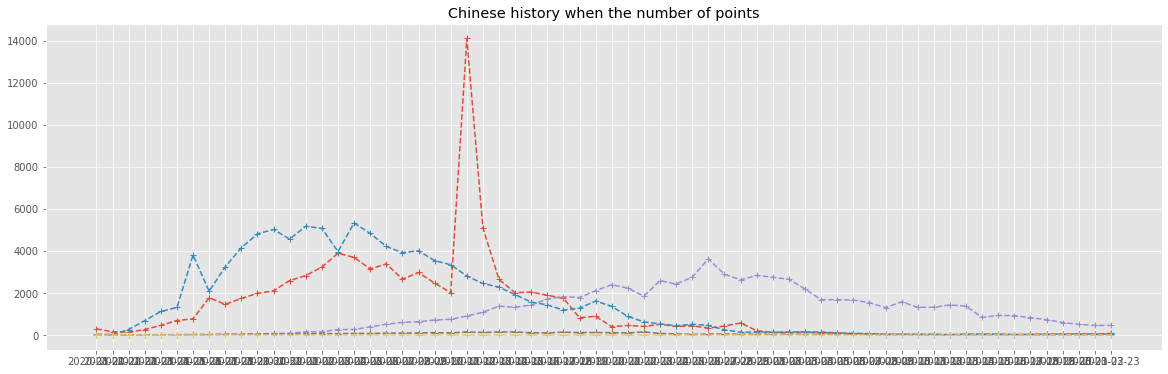

In [63]:
pt.figure(figsize=(20,6))
pt.plot(df,'+--')
pt.title(txt)

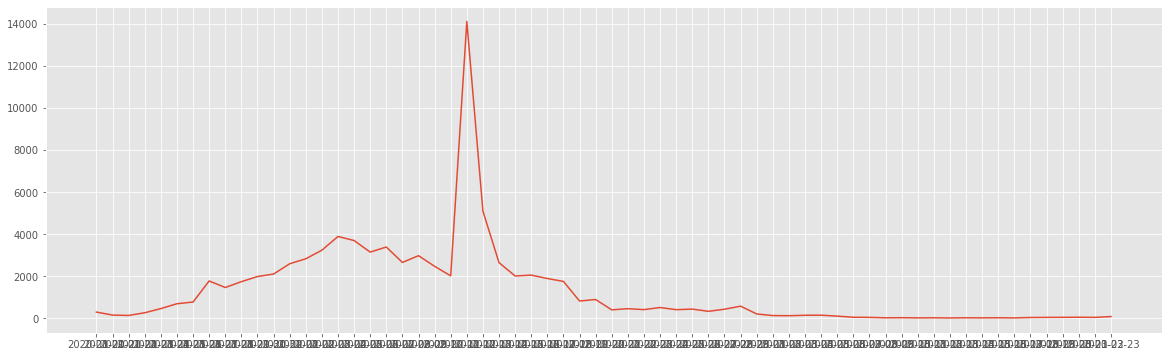

In [68]:
pt.figure(figsize=(20,6))
pt.plot(df.confirm)

In [69]:
import scipy as sp

In [158]:
x = np.random.normal(size = 2*100).reshape(-1,2)
y = np.random.normal(size = 100)

In [159]:
def lm(p , y, x):
    return np.sum(  np.power(y - (x[:,0] + p * x[:,1]),2) )

In [160]:
p = 0.0 # initial 

In [161]:
print(sp.optimize.least_squares(lm,p,args=(y,x)))

 active_mask: array([0.])
        cost: 14006.548822585946
         fun: array([167.37113743])
        grad: array([0.11109382])
         jac: array([[0.00066376]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 14
        njev: 7
  optimality: 0.11109381833309578
      status: 2
     success: True
           x: array([-0.12042236])


In [162]:
param = sp.optimize.least_squares(lm,p,args=(y,x)).x

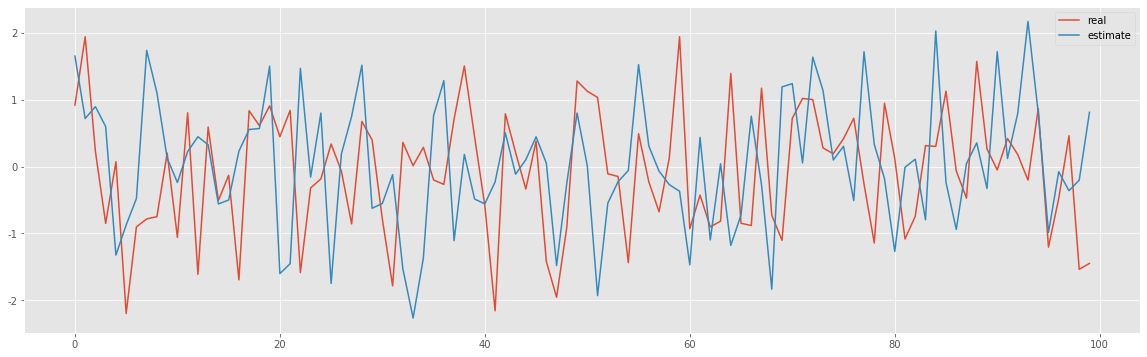

In [163]:
pt.figure(figsize=(20,6))
pt.plot(y,label = 'real')
pt.plot((x[:,0] + param * x[:,1]),label = 'estimate')
pt.legend()
pt.show()

In [164]:
y = np.sort(y)
x = np.sort(x)

In [165]:
def error(p,y,x):
    func = x[:,0]*np.exp(p * x[:,1])
    return np.sum( np.power(y- func,2))

In [166]:
param = sp.optimize.least_squares(error,p,args=(y,x)).x
print(param)

[-0.14141846]


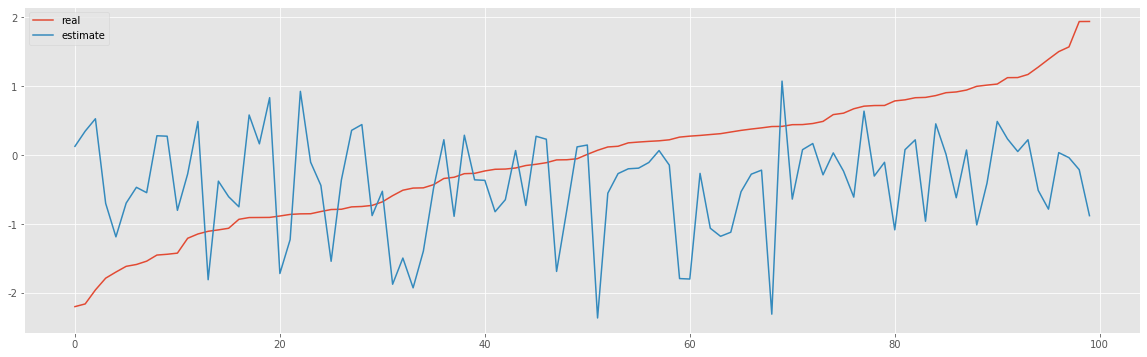

In [167]:
pt.figure(figsize=(20,6))
pt.plot(y,label = 'real')
pt.plot((x[:,0]*np.exp(param * x[:,1])),label = 'estimate')
pt.legend()
pt.show()